In [12]:
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt
import random

In [2]:
# Read the video from specified path
cam = cv.VideoCapture("IMG_2607.MOV")

try:
    # creating a folder named data
    if not os.path.exists('images'):
        os.makedirs('images')

# if not created then raise error
except OSError:
    print ('Error: Creating directory of data')

In [3]:
# frame
currentframe = 0

while(True):
    # reading from frame
    ret,frame = cam.read()
    if ret:
        # if video is still left continue creating images
        name = './images/frame' + str(currentframe) + '.jpg'
        print ('Creating...' + name)

        # writing the extracted images
        cv.imwrite(name, frame)

        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
    else:
        break

# Release all space and windows once done
cam.release()
cv.destroyAllWindows()

Creating..../images/frame0.jpg
Creating..../images/frame1.jpg
Creating..../images/frame2.jpg
Creating..../images/frame3.jpg
Creating..../images/frame4.jpg
Creating..../images/frame5.jpg
Creating..../images/frame6.jpg
Creating..../images/frame7.jpg
Creating..../images/frame8.jpg
Creating..../images/frame9.jpg
Creating..../images/frame10.jpg
Creating..../images/frame11.jpg
Creating..../images/frame12.jpg
Creating..../images/frame13.jpg
Creating..../images/frame14.jpg
Creating..../images/frame15.jpg
Creating..../images/frame16.jpg
Creating..../images/frame17.jpg
Creating..../images/frame18.jpg
Creating..../images/frame19.jpg
Creating..../images/frame20.jpg
Creating..../images/frame21.jpg
Creating..../images/frame22.jpg
Creating..../images/frame23.jpg
Creating..../images/frame24.jpg
Creating..../images/frame25.jpg
Creating..../images/frame26.jpg
Creating..../images/frame27.jpg
Creating..../images/frame28.jpg
Creating..../images/frame29.jpg
Creating..../images/frame30.jpg
Creating..../image

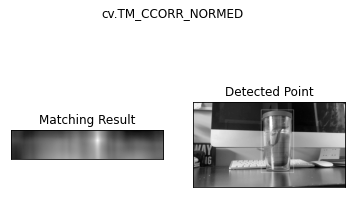

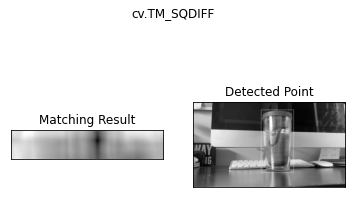

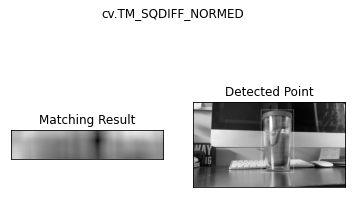

In [9]:
img = cv.imread('images/frame4.jpg',0)
img2 = img.copy()
template = cv.imread('images/cropped_object.jpg',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show() 

Match not found in picture: images/frame202.jpg


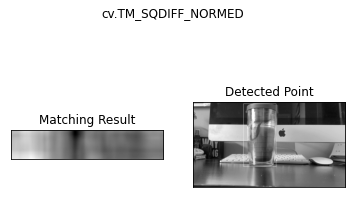

Match not found in picture: images/frame67.jpg


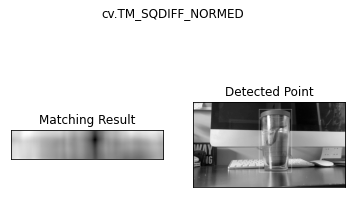

Match not found in picture: images/frame17.jpg


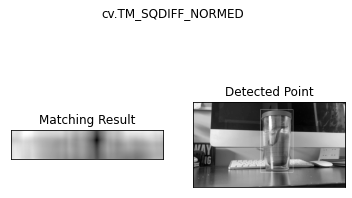

Match not found in picture: images/frame1.jpg


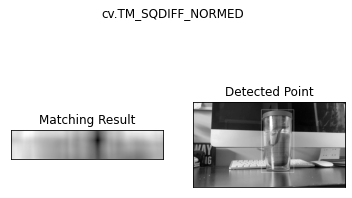

Match not found in picture: images/frame64.jpg


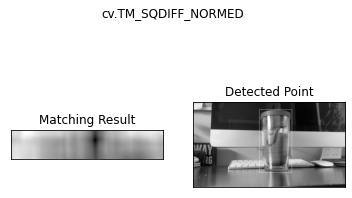

Match not found in picture: images/frame210.jpg


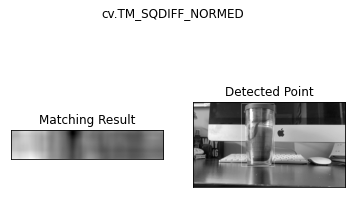

Match not found in picture: images/frame99.jpg


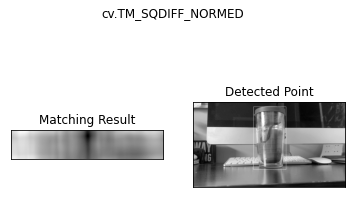

Match not found in picture: images/frame153.jpg


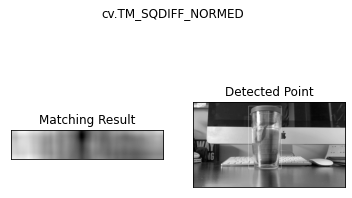

Match not found in picture: images/frame115.jpg


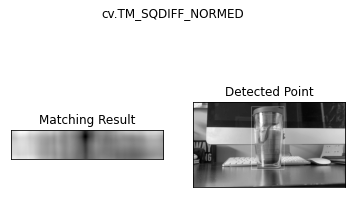

In [21]:
cropped_image = cv.imread('images/cropped_object.jpg',0)
w,h = cropped_image.shape[::-1]

pictures = []
for i in range(1, 10):
    number = random.randint(0, 342)
    pictures.append('images/frame' + str(number) + '.jpg')

#print(pictures)

for picture in pictures:
    img = cv.imread(picture,0)
    img2.copy()
    method = eval('cv.TM_SQDIFF')
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    if min_val < 0.1:
        print('Match found in picture: ' + picture)
    else:
        print('Match not found in picture: ' + picture)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()